In [1]:
from annotation_parser import parseAnnotation
from common import ANNOTATIONSCOREDUPLES
from score_parser import parseScore
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from music21.converter import parse as m21parse
pd.set_option('display.max_rows', 6000)

In [2]:
def getAlignmentDataFrame(a, s):
    alignmentdf = pd.concat([a.a_measure, s.s_measure], axis=1)
    alignmentdf['misalignment'] = (alignmentdf.a_measure != alignmentdf.s_measure)
    return alignmentdf

In [3]:
f = "abc-op131-1"
aPath, sPath = ANNOTATIONSCOREDUPLES[f]

In [4]:
a = parseAnnotation(aPath)
s = parseScore(sPath)
alignmentdf = getAlignmentDataFrame(a, s)

In [5]:
a = m21parse(aPath, format="romantext")
s = m21parse(sPath)
# a.show('xml')
# s.show('xml')

In [6]:
alignmentdf.head()

,a_measure,s_measure,misalignment
0.00,0.0,0.0,False
0.25,0.0,0.0,False
0.50,0.0,0.0,False
0.75,0.0,0.0,False
1.00,1.0,1.0,False


First misalignment at:
       a_measure  s_measure  misalignment
481.0      121.0      120.0          True
Alignment Score:  0.008247422680412371


<AxesSubplot:ylabel='a_measure'>

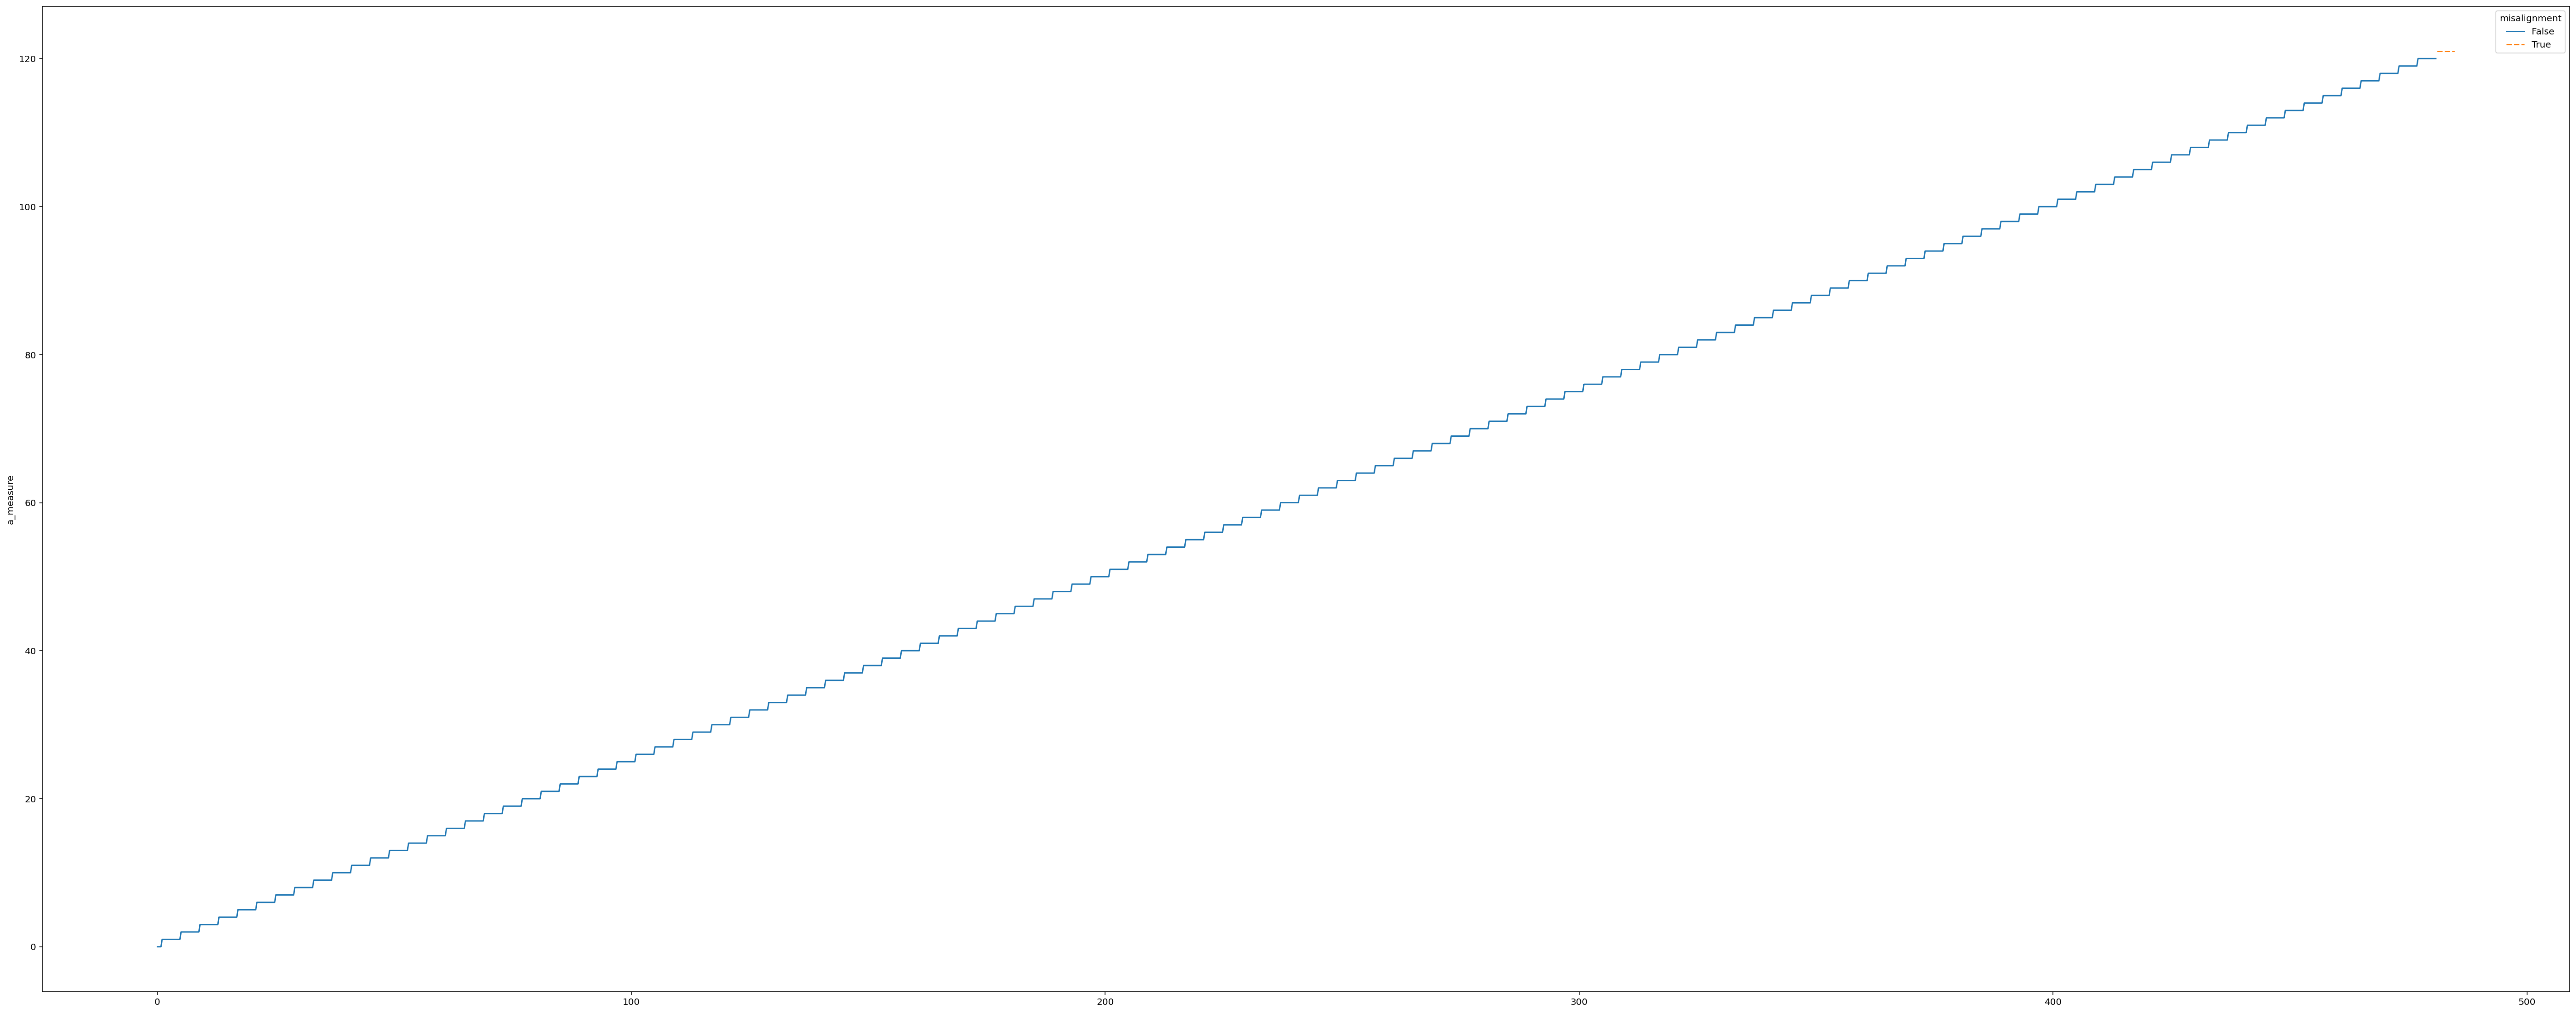

In [7]:
print('First misalignment at:')
print(alignmentdf[alignmentdf.misalignment].head(1))
print("Alignment Score: ", alignmentdf.misalignment.mean())
plt.figure(figsize=(50, 20))
sns.lineplot(x=alignmentdf.index, y='a_measure', hue="misalignment", style="misalignment", data=alignmentdf)

In [8]:
alignmentdf

,a_measure,s_measure,misalignment
0.00,0.0,0.0,False
0.25,0.0,0.0,False
0.50,0.0,0.0,False
0.75,0.0,0.0,False
1.00,1.0,1.0,False
1.25,1.0,1.0,False
1.50,1.0,1.0,False
1.75,1.0,1.0,False
2.00,1.0,1.0,False
2.25,1.0,1.0,False
